**Library to track time**

In [ ]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%load_ext autotime

time: 80.2 µs (started: 2022-07-29 08:18:47 +00:00)


**Divide & Conqur**

In [ ]:
from math import sqrt, floor
import numpy as np

def naive_sharding(ds, k):
    """
    Create cluster centroids using deterministic naive sharding algorithm.
    
    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    """
    
    n = np.shape(ds)[1]
    m = np.shape(ds)[0]
    centroids = np.mat(np.zeros((k,n)))

    # Sum all elements of each row, add as col to original dataset, sort
    composite = np.mat(np.sum(ds, axis=1))
    ds = np.append(composite.T, ds, axis=1)
    ds.sort(axis=0)

    # Step value for dataset sharding
    step = floor(m/k)

    # Vectorize mean ufunc for numpy array
    vfunc = np.vectorize(_get_mean)

    # Divide matrix rows equally by k-1 (so that there are k matrix shards)
    # Sum columns of shards, get means; these columnar means are centroids
    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(ds[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(ds[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

def _get_mean(sums, step):
    """
    Vectorizable ufunc for getting means of summed shard columns.
    
    Parameters
    ----------
    sums : float
        The summed shard columns.
    step : int
        The number of instances per shard.
    Returns
    -------
    sums/step (means) : numpy array
        The means of the shard columns.
    """

    return sums/step

time: 21.8 ms (started: 2022-07-29 08:19:30 +00:00)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as metrics


time: 2.01 ms (started: 2022-07-29 08:20:04 +00:00)


In [ ]:
df = pd.read_csv("https://github.com/sumit07041997/Thesis/blob/bd4a5629977956766c3d19e968d6bba4c6dbb279/Acciedent%20UB.csv?raw=true")

time: 695 ms (started: 2022-07-29 08:20:08 +00:00)


In [ ]:
df.isnull().values.any()

False

time: 13.3 ms (started: 2022-07-29 08:20:19 +00:00)


**Elbow Method**

1. Using Distortion 
- Computes the sum of squared distances from each point to its assigned center.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data= scaler.fit_transform(df)

time: 16.8 ms (started: 2022-07-29 08:21:21 +00:00)


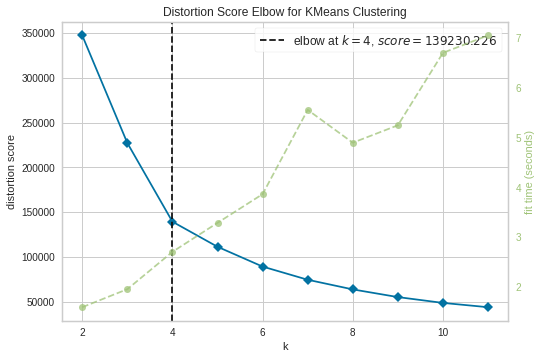

time: 44 s (started: 2022-07-29 08:21:33 +00:00)


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='distortion'
)
visualizer.fit(data)        
visualizer.show() 

# 2. Silhouette score 


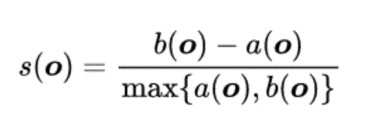

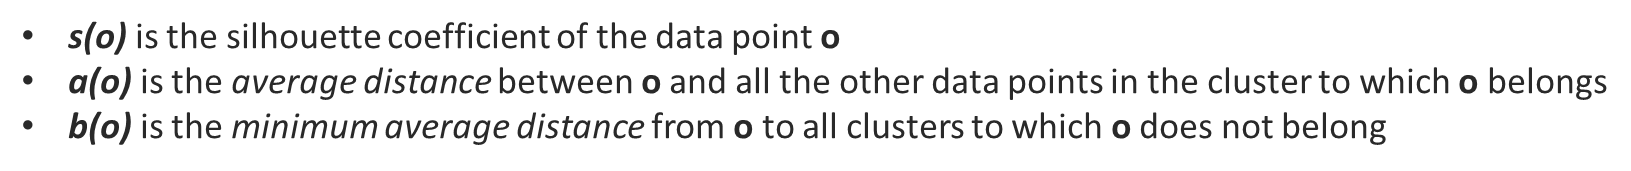

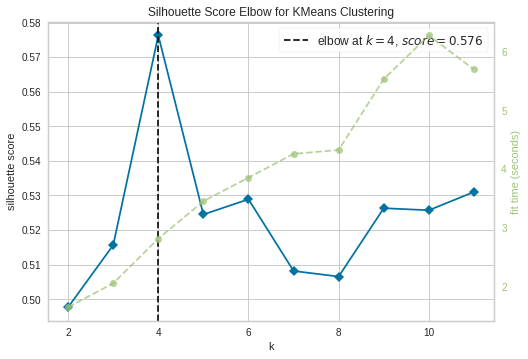

time: 3h 22min 25s (started: 2022-07-29 08:33:12 +00:00)


In [ ]:
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette')
visualizer.fit(data) 
visualizer.show()

3. calinski_harabasz score 
- computes the ratio of dispersion between and within clusters.

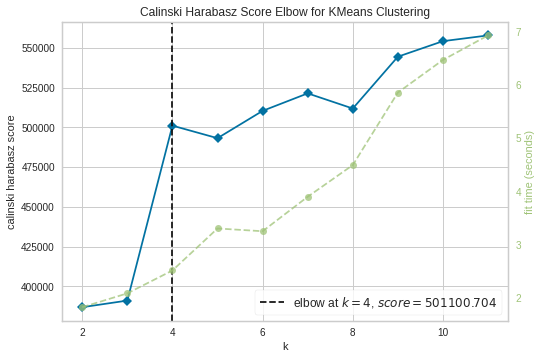

time: 41.4 s (started: 2022-07-29 08:24:18 +00:00)


In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz')
visualizer.fit(data) 
visualizer.show()

Time comparison on K-means++, random & divide

In [ ]:
kmeans = KMeans(n_clusters=4,init='random', random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)
kmeans.cluster_centers_

Iterations:  8


array([[-1.20832215, -0.96649485],
       [ 0.95220618, -0.74834054],
       [-0.36511835,  0.58620166],
       [-1.76639423,  2.45986793]])

time: 4.64 s (started: 2022-07-29 08:31:12 +00:00)


In [ ]:
kmeans = KMeans(n_clusters=4,init='k-means++', random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)
kmeans.cluster_centers_

Iterations:  5


array([[-0.36512158,  0.58619039],
       [ 0.95220618, -0.74834054],
       [-1.76639423,  2.45986793],
       [-1.20835461, -0.9665322 ]])

time: 2.7 s (started: 2022-07-29 08:31:29 +00:00)


In [ ]:
kmeans = KMeans(n_clusters=4,init=naive_sharding(data,4), random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)
kmeans.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


Iterations:  9


array([[-1.20835461, -0.9665322 ],
       [-0.36512158,  0.58619039],
       [ 0.95220618, -0.74834054],
       [-1.76639423,  2.45986793]])

time: 589 ms (started: 2022-07-29 08:31:54 +00:00)


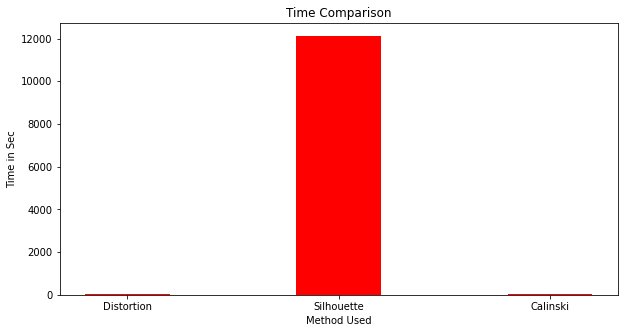

In [2]:
import numpy as np
import matplotlib.pyplot as plt
 

method = ['Distortion','Silhouette','Calinski']
time = [44,12122,41.4]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(method, time, color ='red',
        width = 0.4)
 
plt.xlabel("Method Used")
plt.ylabel("Time in Sec")
plt.title("Time Comparison")
plt.show()